In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import csv
import os
from keras import backend as K
import math
from scipy.stats import norm
from sklearn.ensemble import RandomForestRegressor
import os
from scipy.spatial.transform import Rotation as R
import re

In [3]:
#scale of bulkflows used for this set is 50 MPC 
bulkflows = np.load("C:/Users/19133/Documents/Research/Feldman/ML/true_bulkflows50.npy")
bulkflows[:,0]

array([ -60.02848356,  214.27851932, -403.83556139])

In [3]:
#here I am going through 300 catalogs that correspond to the bulkflows file 
#and rotating each 20 times 
#including their bulk flows
#i save all relevant information to a single file at the end for each rotation 

bulkflows = np.load("C:/Users/19133/Documents/Research/Feldman/ML/true_bulkflows50.npy")
galaxy_index = []
path = "C:/Users/19133/Documents/Research/Feldman/Catalogs/CF3-OuterRim-CF3grouplike-cz-rand/CF3-OuterRim-CF3grouplike-cz-rand"

for x in os.listdir(path): 
    data = np.load(path + "/" + x)

    i = 0 
    while i < 20: 
        temp = re.findall(r'\d+', x)
        res = list(map(int, temp))
        bulkflow_ind = res[2]
        galaxy_index.append(bulkflow_ind)

        bulkflow = bulkflows[:,bulkflow_ind] #0 - bulkflow ind

        rshift = data[:,6]
        distmod = 5*np.log(data[:,7]) + 25 
        distmod_err = np.random.normal(0, 0.4, len(distmod))

        glon= data[:,10]*np.pi/180
        glat= data[:,11]*np.pi/180

        #make glon and glat into array of positions on the unit sphere
        pos= np.array([np.cos(glon)*np.cos(glat),np.sin(glon)*np.cos(glat),np.sin(glat)])
        pos=np.transpose(pos)

        alpha= 2*np.pi*np.random.random()  #generate random rotation angles
        gamma= 2*np.pi*np.random.random()
        beta= np.pi*np.random.random()

        r = R.from_euler('xzx', [alpha,beta,gamma]) #create the rotation

        posprime=r.apply(pos)  #apply the rotation to the vectors

        #bulkflows already in cartesian, so no transformation like above? 
        bulkflowprime=r.apply(bulkflow)

        rotated_bulkflows.append(bulkflowprime)

        glonprime= np.arctan2(posprime[:,1],posprime[:,0])*180/np.pi  #convert back to glon and glat
        glonprime[glonprime<0]= 360+glonprime[glonprime<0]

        glatprime= np.arcsin(posprime[:,2])*180/np.pi

        # add rshift, dist mod, dist mod error, glon, glat, bulk flow to new file 
        with open('C:/Users/19133/Documents/Research/Feldman/ML/Rotated_diff/Rotated Catalog' + str(bulkflow_ind) + '_' + str(i) + '.npy.npz', 'wb') as f:
            stuff = np.array([rshift,glonprime,glatprime,distmod,distmod_err])
            np.savez(f, redshift=rshift, glon=glonprime, glat=glatprime, distm = distmod, distmerr = distmod_err, bulkflow=bulkflowprime)
            f.close()

        i+=1
 

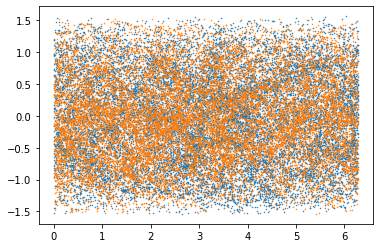

In [3]:
#example on one catalog with visual 
path = "C:/Users/19133/Documents/Research/Feldman/Catalogs/CF3-OuterRim-cz-LG"
data= np.load(path + "/CF3-OuterRim-cz-LG-m11_13-box-263.npy")

glon= data[:,10]*np.pi/180
glat= data[:,11]*np.pi/180

#make glon and glat into array of positions on the unit sphere
pos= np.array([np.cos(glon)*np.cos(glat),np.sin(glon)*np.cos(glat),np.sin(glat)])
pos=np.transpose(pos)

alpha= 2*np.pi*np.random.random()  #generate random rotation angles
gamma= 2*np.pi*np.random.random()
beta= np.pi*np.random.random()

r = R.from_euler('xzx', [alpha,beta,gamma]) #create the rotation

posprime=r.apply(pos)  #apply the rotation to the vectors

glonprime= np.arctan2(posprime[:,1],posprime[:,0])*180/np.pi  #convert back to glon and glat
glonprime[glonprime<0]= 360+glonprime[glonprime<0]

glatprime= np.arcsin(posprime[:,2])*180/np.pi
                    
plt.plot(glonprime*np.pi/180,glatprime*np.pi/180,'.',markersize=1)
plt.plot(glon,glat,'.',markersize=1)